In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
# Load the commodity price data
commodity_data = pd.read_csv('Sugar16Futures_SF_NYB.csv')
commodity_data = commodity_data.rename(columns={'Date': 'DATE'})
commodity_data = commodity_data.set_index('DATE')

# Load the weather data for different locations
weather_data_arg = pd.read_csv('Argentina_Weather.csv', index_col='DATE')
weather_data_bra = pd.read_csv('Brazil_Weather.csv', index_col='DATE')
weather_data_cal = pd.read_csv('California_Weather.csv', index_col='DATE')
weather_data_ill = pd.read_csv('Illinois_Weather.csv', index_col='DATE')
weather_data_iow = pd.read_csv('Iowa_Weather.csv', index_col='DATE')
weather_data_min = pd.read_csv('Minnesota_Weather.csv', index_col='DATE')
weather_data_neb = pd.read_csv('Nebraska_Weather.csv', index_col='DATE')

In [3]:
commodity_data

,Open,High,Low,Close,Adj Close,Volume
DATE,,,,,,
2018-01-02,1.0343,1.0365,1.0313,1.0343,1.0343,23152
2018-01-03,1.0288,1.0350,1.0258,1.0288,1.0288,25655
2018-01-04,1.0310,1.0321,1.0275,1.0310,1.0310,17166
2018-01-05,1.0301,1.0317,1.0269,1.0301,1.0301,20919
2018-01-08,1.0276,1.0309,1.0269,1.0276,1.0276,19659
...,...,...,...,...,...,...
2020-05-22,1.0288,1.0317,1.0279,1.0288,1.0288,17962
2020-05-26,1.0368,1.0372,1.0277,1.0368,1.0368,22899
2020-05-27,1.0327,1.0365,1.0285,1.0327,1.0327,29845


In [4]:
# Merge the commodity data and weather data into a single DataFrame
data_arg = pd.merge(commodity_data, weather_data_arg, on='DATE')
data_bra = pd.merge(commodity_data, weather_data_bra, on='DATE')
data_cal = pd.merge(commodity_data, weather_data_cal, on='DATE')
data_ill = pd.merge(commodity_data, weather_data_ill, on='DATE')
data_iow = pd.merge(commodity_data, weather_data_iow, on='DATE')
data_min = pd.merge(commodity_data, weather_data_min, on='DATE')
data_neb = pd.merge(commodity_data, weather_data_neb, on='DATE')

In [5]:
data_arg

,Open,High,Low,Close,Adj Close,Volume,Mean_Temp,Max_Temp,Min_Temp,Mean_Precip,Mean_WindSpeed
DATE,,,,,,,,,,,
2018-01-02,1.0343,1.0365,1.0313,1.0343,1.0343,23152,22.109231,34.2,4.8,0.108906,7.169231
2018-01-03,1.0288,1.0350,1.0258,1.0288,1.0288,25655,23.378462,38.7,4.0,0.030156,7.518462
2018-01-04,1.0310,1.0321,1.0275,1.0310,1.0310,17166,25.525000,41.1,3.5,0.028889,9.192187
2018-01-05,1.0301,1.0317,1.0269,1.0301,1.0301,20919,23.567692,42.0,5.8,0.126230,9.741538
2018-01-08,1.0276,1.0309,1.0269,1.0276,1.0276,19659,25.449231,41.5,4.1,0.006885,7.047692
...,...,...,...,...,...,...,...,...,...,...,...
2020-05-22,1.0288,1.0317,1.0279,1.0288,1.0288,17962,10.250667,29.6,-9.2,0.276567,9.386667
2020-05-26,1.0368,1.0372,1.0277,1.0368,1.0368,22899,12.357143,29.6,-5.5,0.008947,5.413158
2020-05-27,1.0327,1.0365,1.0285,1.0327,1.0327,29845,12.966234,31.0,-4.8,0.001818,5.423684


In [6]:
data_arg[:-21]

,Open,High,Low,Close,Adj Close,Volume,Mean_Temp,Max_Temp,Min_Temp,Mean_Precip,Mean_WindSpeed
DATE,,,,,,,,,,,
2018-01-02,1.0343,1.0365,1.0313,1.0343,1.0343,23152,22.109231,34.2,4.8,0.108906,7.169231
2018-01-03,1.0288,1.0350,1.0258,1.0288,1.0288,25655,23.378462,38.7,4.0,0.030156,7.518462
2018-01-04,1.0310,1.0321,1.0275,1.0310,1.0310,17166,25.525000,41.1,3.5,0.028889,9.192187
2018-01-05,1.0301,1.0317,1.0269,1.0301,1.0301,20919,23.567692,42.0,5.8,0.126230,9.741538
2018-01-08,1.0276,1.0309,1.0269,1.0276,1.0276,19659,25.449231,41.5,4.1,0.006885,7.047692
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-23,1.0259,1.0320,1.0248,1.0259,1.0259,20411,18.776316,35.5,-3.2,0.000725,5.954667
2020-04-24,1.0271,1.0296,1.0216,1.0271,1.0271,15646,20.241333,36.2,-4.0,0.046389,7.244000
2020-04-27,1.0265,1.0313,1.0253,1.0265,1.0265,12436,17.792000,37.5,-4.5,0.273731,7.232432


In [7]:
train_data_arg = data_arg[:-21]
test_data_arg = data_arg[-21:]

train_data_bra = data_bra[:-21]
test_data_bra = data_bra[-21:]

train_data_cal = data_cal[:-21]
test_data_cal = data_cal[-21:]

train_data_ill = data_ill[:-21]
test_data_ill = data_ill[-21:]

train_data_iow = data_iow[:-21]
test_data_iow = data_iow[-21:]

train_data_min = data_min[:-21]
test_data_min = data_min[-21:]

train_data_neb = data_neb[:-21]
test_data_neb = data_neb[-21:]


In [8]:
train_data_arg.shape

(585, 11)

In [9]:
# For ARG
exog_train_arg = train_data_arg[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_arg = test_data_arg[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For BRA
exog_train_bra = train_data_bra[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_bra = test_data_bra[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For CAL
exog_train_cal = train_data_cal[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_cal = test_data_cal[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For ILL
exog_train_ill = train_data_ill[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_ill = test_data_ill[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For IOW
exog_train_iow = train_data_iow[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_iow = test_data_iow[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For MIN
exog_train_min = train_data_min[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_min = test_data_min[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]

# For NEB
exog_train_neb = train_data_neb[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]
exog_test_neb = test_data_neb[['Mean_Temp', 'Mean_Precip', 'Mean_WindSpeed']]


In [10]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

AutoARIMA using weather data

In [11]:
import pmdarima as pm
import matplotlib.pyplot as plt

In [12]:
# Fit the ARIMA model with exogenous variables
model_arg = pm.auto_arima(train_data_arg['Close'], exogenous=exog_train_arg, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_arg.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  585
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2353.687
Date:                Sat, 08 Apr 2023   AIC                          -4699.375
Time:                        00:46:41   BIC                          -4681.895
Sample:                             0   HQIC                         -4692.562
                                - 585                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp       -6.59e-06   9.74e-05     -0.068      0.946      -0.000       0.000
Mean_Precip       -0.0004      0.001     -0.312      0.755      -0.003       0.002
Mean_WindSpeed    -0.0002      0.000

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


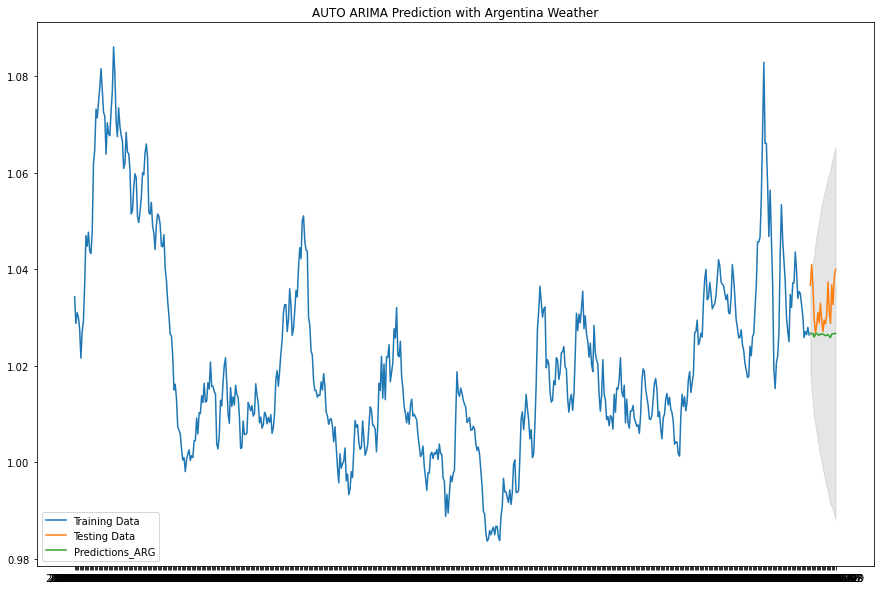

In [13]:
# Forecast
forecast_arg, confint_arg = model_arg.predict(n_periods=len(test_data_arg), 
                                               exogenous=exog_test_arg, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame
pred_arg = pd.DataFrame(forecast_arg, index=test_data_arg.index, columns=['Predictions_ARG'])
confint_arg = pd.DataFrame(confint_arg, index=test_data_arg.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_arg.index, train_data_arg['Close'], label='Training Data')
plt.plot(test_data_arg.index, test_data_arg['Close'], label='Testing Data')
plt.plot(pred_arg.index, pred_arg['Predictions_ARG'], label='Predictions_ARG')
plt.fill_between(confint_arg.index, confint_arg['Lower_CI'], confint_arg['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Argentina Weather')
plt.show()

In [14]:
from sklearn.metrics import r2_score
r2_score(test_data_arg['Close'], pred_arg['Predictions_ARG'])

-1.9023823504086135

In [15]:
# Fit the ARIMA model with exogenous variables for BRA
model_bra = pm.auto_arima(train_data_bra['Close'], exogenous=exog_train_bra, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)
# Print the summary of the model
print(model_bra.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  585
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2353.225
Date:                Sat, 08 Apr 2023   AIC                          -4698.450
Time:                        00:46:46   BIC                          -4680.971
Sample:                             0   HQIC                         -4691.637
                                - 585                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp       -1.44e-05      0.000     -0.061      0.951      -0.000       0.000
Mean_Precip       -0.0001      0.021     -0.005      0.996      -0.042       0.041
Mean_WindSpeed     0.0004      0.000

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


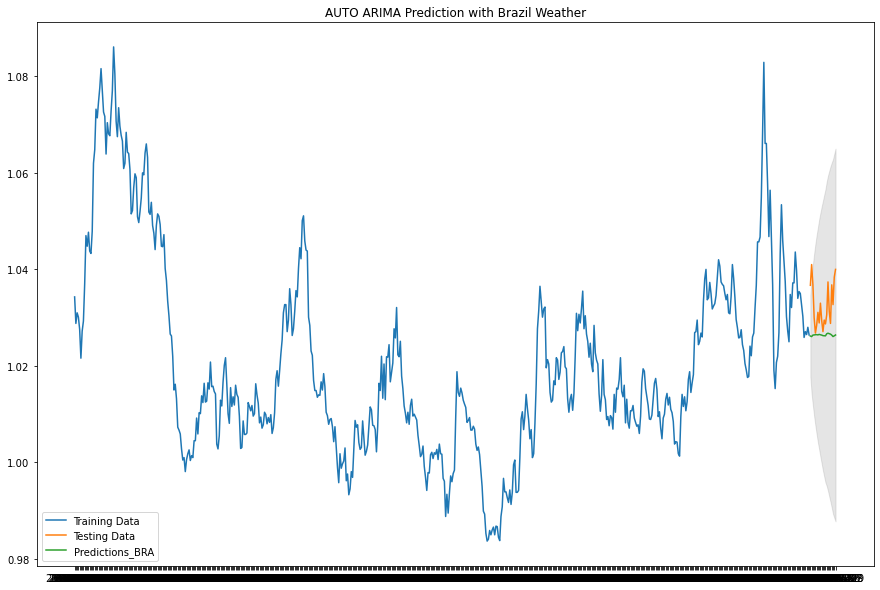

In [16]:
# Forecast for Brazil
forecast_bra, confint_bra = model_bra.predict(n_periods=len(test_data_bra), 
                                               exogenous=exog_test_bra, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame for Brazil
pred_bra = pd.DataFrame(forecast_bra, index=test_data_bra.index, columns=['Predictions_BRA'])
confint_bra = pd.DataFrame(confint_bra, index=test_data_bra.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval for Brazil
plt.figure(figsize=(15, 10))
plt.plot(train_data_bra.index, train_data_bra['Close'], label='Training Data')
plt.plot(test_data_bra.index, test_data_bra['Close'], label='Testing Data')
plt.plot(pred_bra.index, pred_bra['Predictions_BRA'], label='Predictions_BRA')
plt.fill_between(confint_bra.index, confint_bra['Lower_CI'], confint_bra['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Brazil Weather')
plt.show()

In [17]:
from sklearn.metrics import r2_score
r2_score(test_data_bra['Close'], pred_bra['Predictions_BRA'])

-2.0345870947423914

In [18]:
# Fit the ARIMA model with exogenous variables for California
model_cal = pm.auto_arima(train_data_cal['Close'], exogenous=exog_train_cal, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model for California
print(model_cal.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  585
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2354.778
Date:                Sat, 08 Apr 2023   AIC                          -4701.556
Time:                        00:46:51   BIC                          -4684.077
Sample:                             0   HQIC                         -4694.744
                                - 585                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp       3.229e-05      0.000      0.280      0.780      -0.000       0.000
Mean_Precip       -0.0040      0.002     -1.867      0.062      -0.008       0.000
Mean_WindSpeed     0.0001      0.000

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


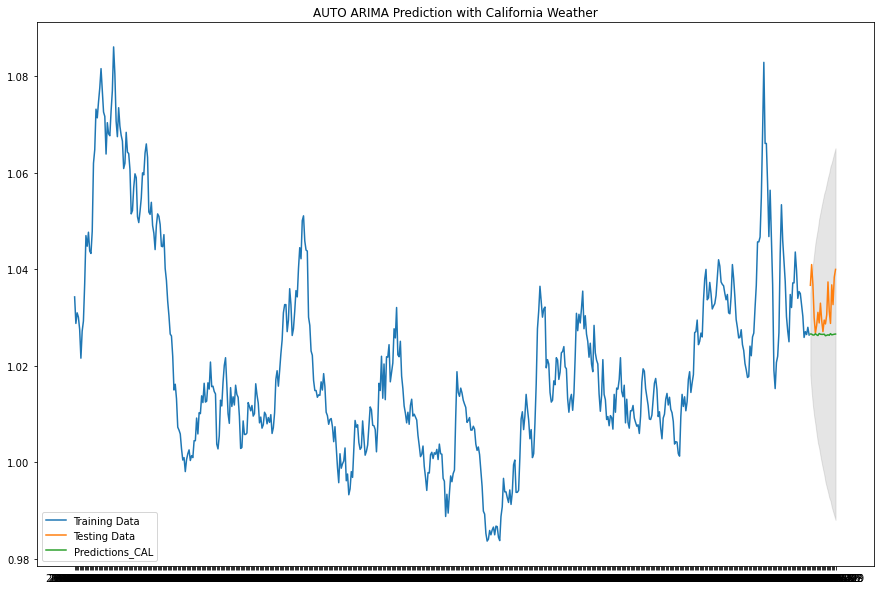

In [19]:
# Forecast for California
forecast_cal, confint_cal = model_cal.predict(n_periods=len(test_data_cal), 
                                               exogenous=exog_test_cal, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame for California
pred_cal = pd.DataFrame(forecast_cal, index=test_data_cal.index, columns=['Predictions_CAL'])
confint_cal = pd.DataFrame(confint_cal, index=test_data_cal.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval for California
plt.figure(figsize=(15, 10))
plt.plot(train_data_cal.index, train_data_cal['Close'], label='Training Data')
plt.plot(test_data_cal.index, test_data_cal['Close'], label='Testing Data')
plt.plot(pred_cal.index, pred_cal['Predictions_CAL'], label='Predictions_CAL')
plt.fill_between(confint_cal.index, confint_cal['Lower_CI'], confint_cal['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with California Weather')
plt.show()

In [20]:
from sklearn.metrics import r2_score
r2_score(test_data_cal['Close'], pred_cal['Predictions_CAL'])

-1.9444702798882498

In [21]:
# Fit the ARIMA model with exogenous variables using auto_arima
model_ill = pm.auto_arima(train_data_ill['Close'], exogenous=exog_train_ill, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_ill.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  585
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2354.758
Date:                Sat, 08 Apr 2023   AIC                          -4701.517
Time:                        00:46:57   BIC                          -4684.037
Sample:                             0   HQIC                         -4694.704
                                - 585                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp      -6.772e-05   4.56e-05     -1.486      0.137      -0.000    2.16e-05
Mean_Precip       -0.0009      0.001     -0.960      0.337      -0.003       0.001
Mean_WindSpeed  7.735e-05   5.62e-05

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


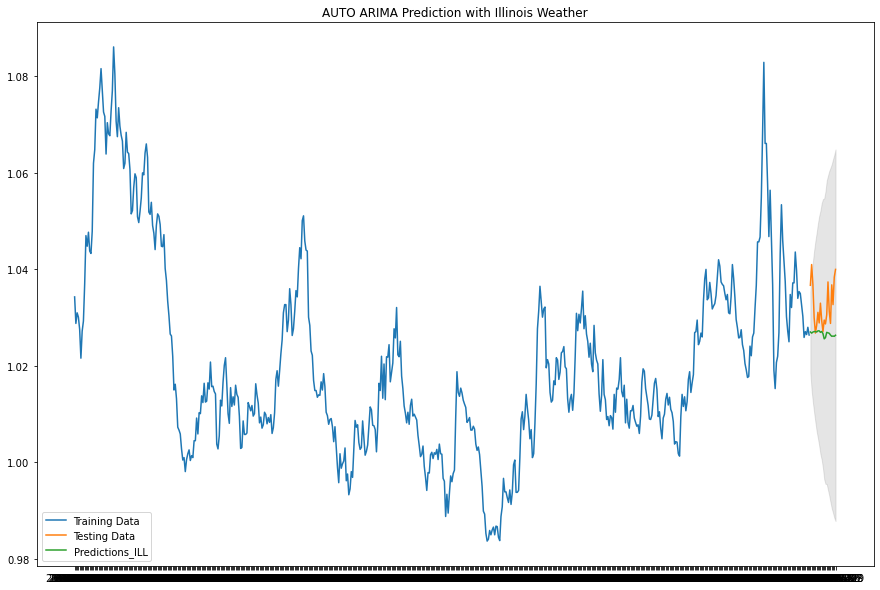

In [22]:
# Forecast
forecast_ill, confint_ill = model_ill.predict(n_periods=len(test_data_ill), 
                                               exogenous=exog_test_ill, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame
pred_ill = pd.DataFrame(forecast_ill, index=test_data_ill.index, columns=['Predictions_ILL'])
confint_ill = pd.DataFrame(confint_ill, index=test_data_ill.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_ill.index, train_data_ill['Close'], label='Training Data')
plt.plot(test_data_ill.index, test_data_ill['Close'], label='Testing Data')
plt.plot(pred_ill.index, pred_ill['Predictions_ILL'], label='Predictions_ILL')
plt.fill_between(confint_ill.index, confint_ill['Lower_CI'], confint_ill['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Illinois Weather')
plt.show()

In [23]:
from sklearn.metrics import r2_score
r2_score(test_data_ill['Close'], pred_ill['Predictions_ILL'])

-1.8642975994981836

In [24]:
# Fit the ARIMA model with exogenous variables using auto_arima
model_iow = pm.auto_arima(train_data_iow['Close'], exogenous=exog_train_iow, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_iow.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  585
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2353.975
Date:                Sat, 08 Apr 2023   AIC                          -4699.949
Time:                        00:47:02   BIC                          -4682.470
Sample:                             0   HQIC                         -4693.137
                                - 585                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp      -2.493e-05   4.95e-05     -0.504      0.614      -0.000     7.2e-05
Mean_Precip       -0.0017      0.001     -1.310      0.190      -0.004       0.001
Mean_WindSpeed  3.786e-05   5.29e-05

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


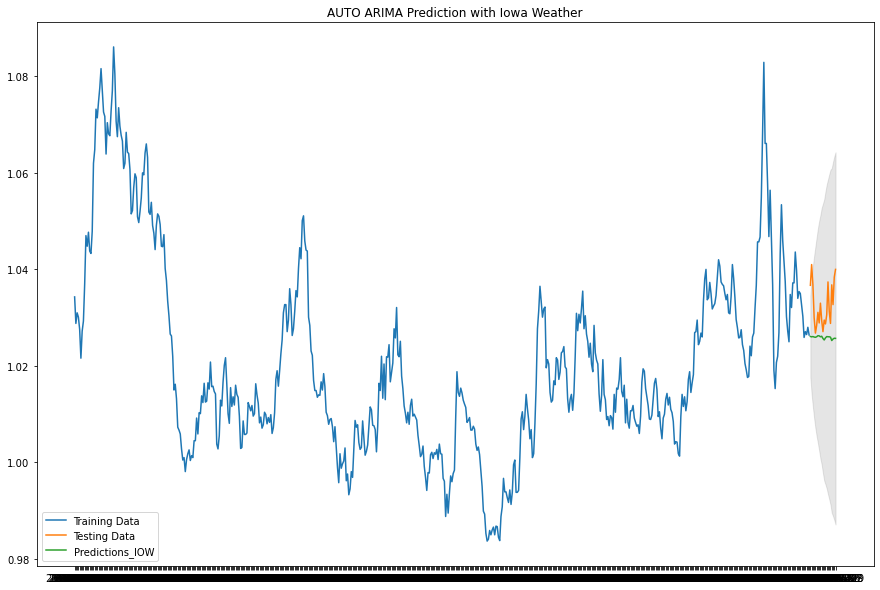

In [25]:
forecast_iow, confint_iow = model_iow.predict(n_periods=len(test_data_iow), 
                                               exogenous=exog_test_iow, return_conf_int=True)

pred_iow = pd.DataFrame(forecast_iow, index=test_data_iow.index, columns=['Predictions_IOW'])
confint_iow = pd.DataFrame(confint_iow, index=test_data_iow.index, columns=['Lower_CI', 'Upper_CI'])

plt.figure(figsize=(15, 10))
plt.plot(train_data_iow.index, train_data_iow['Close'], label='Training Data')
plt.plot(test_data_iow.index, test_data_iow['Close'], label='Testing Data')
plt.plot(pred_iow.index, pred_iow['Predictions_IOW'], label='Predictions_IOW')
plt.fill_between(confint_iow.index, confint_iow['Lower_CI'], confint_iow['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Iowa Weather')
plt.show()

In [26]:
from sklearn.metrics import r2_score
r2_score(test_data_iow['Close'], pred_iow['Predictions_IOW'])

-2.3653426490646123

In [27]:
# Fit the ARIMA model with exogenous variables
model_min = pm.auto_arima(train_data_min['Close'], exogenous=exog_train_min, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_min.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  585
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2354.441
Date:                Sat, 08 Apr 2023   AIC                          -4700.882
Time:                        00:47:08   BIC                          -4683.402
Sample:                             0   HQIC                         -4694.069
                                - 585                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp      -1.433e-05   5.25e-05     -0.273      0.785      -0.000    8.87e-05
Mean_Precip       -0.0025      0.001     -1.759      0.079      -0.005       0.000
Mean_WindSpeed  6.358e-05   5.95e-05

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


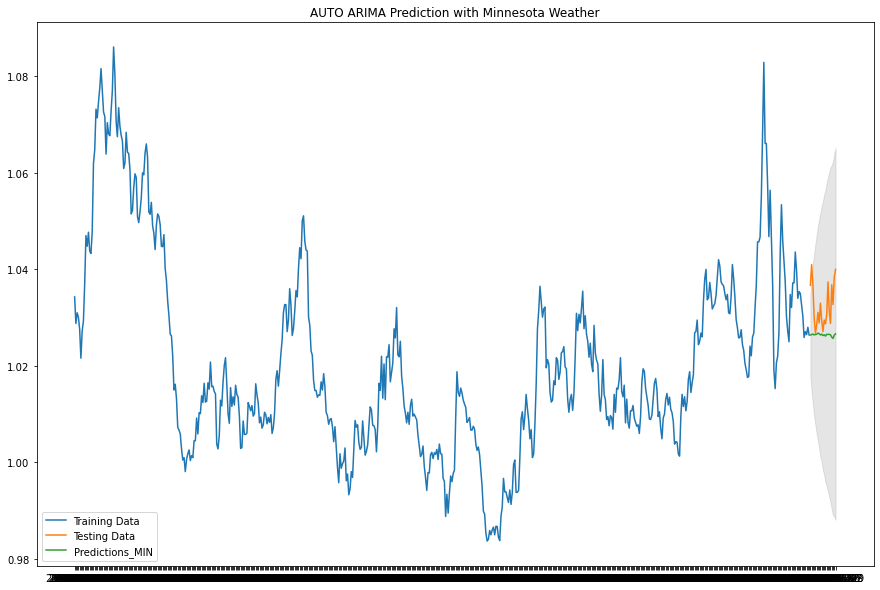

In [28]:
# Forecast
forecast_min, confint_min = model_min.predict(n_periods=len(test_data_min), 
                                               exogenous=exog_test_min, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame
pred_min = pd.DataFrame(forecast_min, index=test_data_min.index, columns=['Predictions_MIN'])
confint_min = pd.DataFrame(confint_min, index=test_data_min.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_min.index, train_data_min['Close'], label='Training Data')
plt.plot(test_data_min.index, test_data_min['Close'], label='Testing Data')
plt.plot(pred_min.index, pred_min['Predictions_MIN'], label='Predictions_MIN')
plt.fill_between(confint_min.index, confint_min['Lower_CI'], confint_min['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Minnesota Weather')
plt.show()

In [29]:
from sklearn.metrics import r2_score
r2_score(test_data_min['Close'], pred_min['Predictions_MIN'])

-1.9991181210651625

In [30]:
# Fit the ARIMA model with exogenous variables
model_neb = pm.auto_arima(train_data_neb['Close'], exogenous=exog_train_neb, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_neb.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  585
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2353.072
Date:                Sat, 08 Apr 2023   AIC                          -4698.143
Time:                        00:47:13   BIC                          -4680.664
Sample:                             0   HQIC                         -4691.331
                                - 585                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Mean_Temp      -2.095e-05   5.49e-05     -0.381      0.703      -0.000    8.67e-05
Mean_Precip       -0.0008      0.001     -0.694      0.488      -0.003       0.002
Mean_WindSpeed  9.865e-06    5.4e-05

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


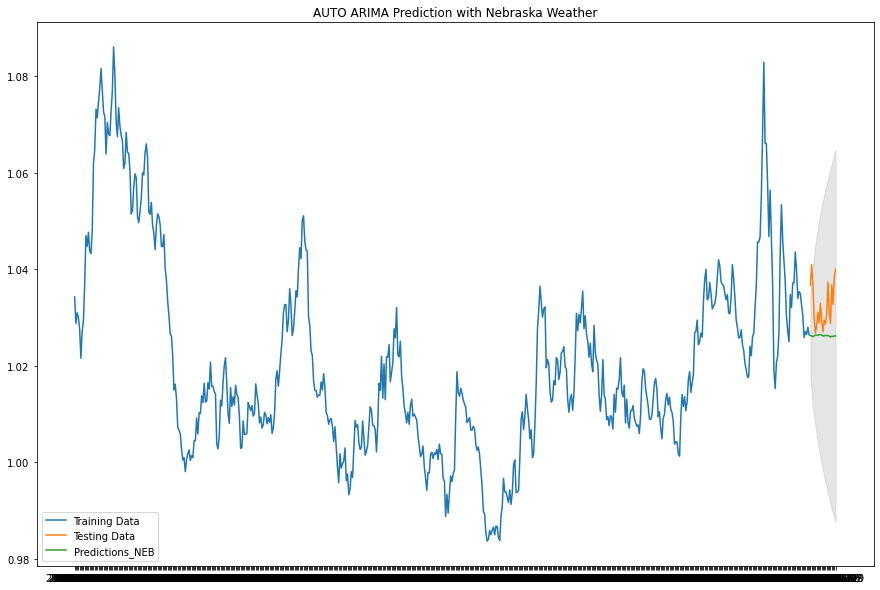

In [31]:
# Forecast
forecast_neb, confint_neb = model_neb.predict(n_periods=len(test_data_neb), 
                                               exogenous=exog_test_neb, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame
pred_neb = pd.DataFrame(forecast_neb, index=test_data_neb.index, columns=['Predictions_NEB'])
confint_neb = pd.DataFrame(confint_neb, index=test_data_neb.index, columns=['Lower_CI', 'Upper_CI'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_neb.index, train_data_neb['Close'], label='Training Data')
plt.plot(test_data_neb.index, test_data_neb['Close'], label='Testing Data')
plt.plot(pred_neb.index, pred_neb['Predictions_NEB'], label='Predictions_NEB')
plt.fill_between(confint_neb.index, confint_neb['Lower_CI'], confint_neb['Upper_CI'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with Nebraska Weather')
plt.show()

In [32]:
from sklearn.metrics import r2_score
r2_score(test_data_neb['Close'], pred_neb['Predictions_NEB'])

-2.126643271209807

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  585
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2360.275
Date:                Sat, 08 Apr 2023   AIC                          -4676.550
Time:                        00:47:26   BIC                          -4580.412
Sample:                             0   HQIC                         -4639.080
                                - 585                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Mean_Temp_arg       -6.34e-08      0.000     -0.001      1.000      -0.000       0.000
Mean_Precip_arg       -0.0008      0.001     -0.615      0.538      -0.003       0.002
Mean_WindSpeed_arg  

C:\Users\jjtan.TABLET-QA4PM1BJ\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


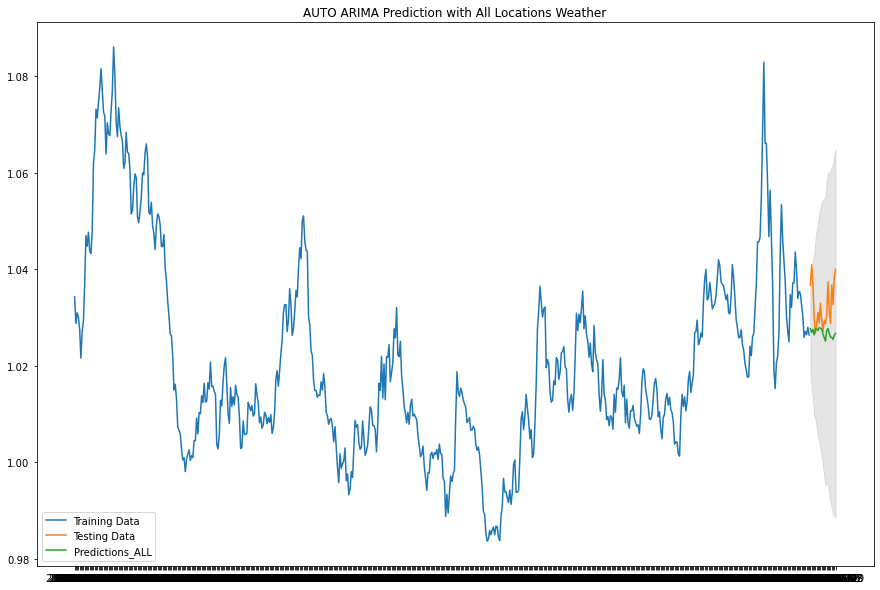

In [33]:
# Concatenate weather data for all locations
exog_train_all = pd.concat([exog_train_arg.add_suffix('_arg'), exog_train_bra.add_suffix('_bra'), 
                            exog_train_cal.add_suffix('_cal'), exog_train_ill.add_suffix('_ill'), 
                            exog_train_iow.add_suffix('_iow'), exog_train_min.add_suffix('_min'), 
                            exog_train_neb.add_suffix('_neb')], axis=1)
exog_test_all = pd.concat([exog_test_arg, exog_test_bra, exog_test_cal, exog_test_ill, 
                           exog_test_iow, exog_test_min, exog_test_neb], axis=1)

exog_train_all.dropna(inplace=True)

# Fit the ARIMA model with exogenous variables
model_all = pm.auto_arima(train_data_arg['Close'], exogenous=exog_train_all, seasonal=False, 
                          error_action='ignore', suppress_warnings=True)

# Print the summary of the model
print(model_all.summary())

# Forecast
forecast_all, confint_all = model_all.predict(n_periods=len(test_data_arg), 
                                               exogenous=exog_test_all, return_conf_int=True)

# Convert the forecast and confidence interval arrays to a Pandas DataFrame
pred_all = pd.DataFrame(forecast_all, index=test_data_arg.index, columns=['Predictions_ALL'])
confint_all = pd.DataFrame(confint_all, index=test_data_arg.index, columns=['Lower_CI_ALL', 'Upper_CI_ALL'])

# Plot the predicted values and the confidence interval
plt.figure(figsize=(15, 10))
plt.plot(train_data_arg.index, train_data_arg['Close'], label='Training Data')
plt.plot(test_data_arg.index, test_data_arg['Close'], label='Testing Data')
plt.plot(pred_all.index, pred_all['Predictions_ALL'], label='Predictions_ALL')
plt.fill_between(confint_all.index, confint_all['Lower_CI_ALL'], confint_all['Upper_CI_ALL'], color='gray', alpha=0.2)
plt.legend(loc='best')
plt.title('AUTO ARIMA Prediction with All Locations Weather')
plt.show()

In [34]:
from sklearn.metrics import r2_score
r2_score(test_data_arg['Close'], pred_all['Predictions_ALL'])

-1.7246169107975433